In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_excel(r"C:\Users\Xutao\Documents\CR4CR\dataset\Market 00abc_240310.xlsx")
df.head()

,Administration,Respondent Id,Assignment Id,Class,Activities,Market.00a_OE,Market.00bc_OE,Market.00bc_OE follow up,Score
0,Spr 23,24977,51207,AP Computer Science Principles22-23 (Sandra Mc...,Spring 2023 CoT Form AA1,"Number of people inside the shop, number of pe...",Number of people inside the shop and number of...,We will definitively need to know the amount o...,3
1,Spr 23,25149,51203,AP Computer Science Principles22-23 (Sandra Mc...,Spring 2023 CoT Form CB2,what causes a door to open automatically.,what can cause a door to open automatically,i think this piece of information is important...,0
2,Spr 23,22791,51290,AP Computer Science Principles22-23 (Sandra Mc...,Spring 2023 CoT Form CB1,How many people are going through the doors. H...,How long it will take for everyone to go throu...,We must know this information to decrease the ...,1
3,Spr 23,22796,51285,AP Computer Science Principles22-23 (Sandra Mc...,Spring 2023 CoT Form CB2,"The groups of customers that might go in, the ...",customers that go in and leave,"Because we need to how many customers go in, a...",1
4,Spr 23,23062,51271,AP Computer Science Principles22-23 (Sandra Mc...,Spring 2023 CoT Form AA1,"How big is the store, as a team of constructio...",What does the owner want.\nHow tall the store ...,This can impact how the finished product will ...,1


In [37]:
## check null values in Score column
df['Score'].isnull().sum()

0

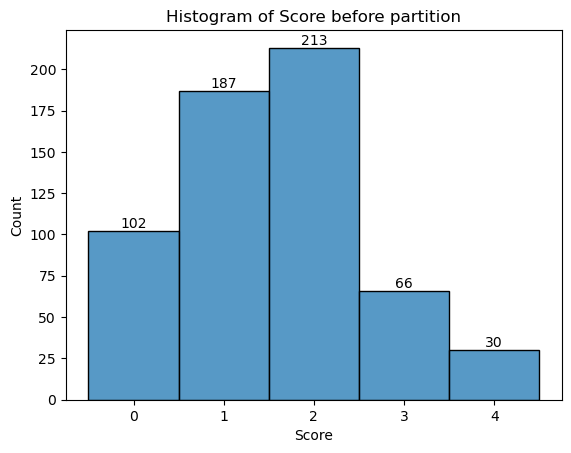

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

## check the histogram of Score
## Score ranges from 0 to 4, discrete values
## Show count of each score
ax = sns.histplot(df['Score'], kde = False, bins = 5, discrete=True)
ax.bar_label(ax.containers[0])
plt.title('Histogram of Score before partition')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()



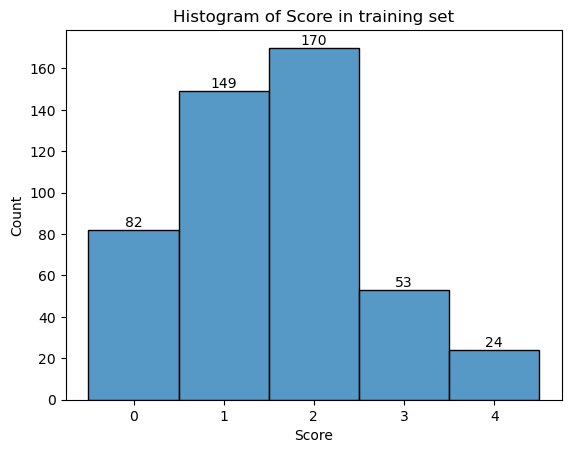

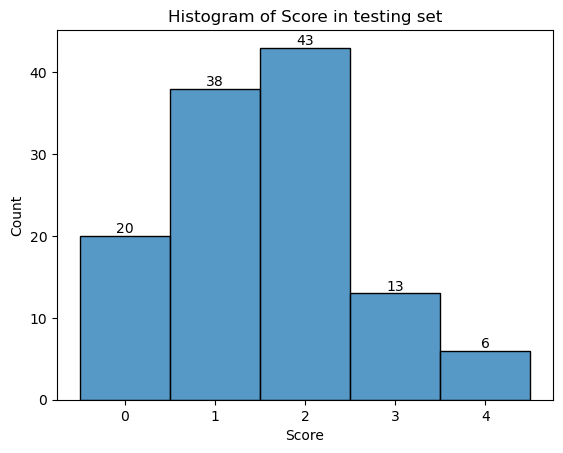

In [39]:
## Since each score has different number of records, we need to partition the dataset into training and testing set with similar distribution of scores
## We can use stratified sampling to partition the dataset

from sklearn.model_selection import train_test_split

## partition the dataset into training and testing set
## stratify the dataset based on the Score column
## 80% of the dataset is used for training and 20% is used for testing
train, test = train_test_split(df, test_size=0.2, stratify=df['Score'], random_state=42)

## check the histogram of Score in training set
ax = sns.histplot(train['Score'], kde = False, bins = 5, discrete=True)
ax.bar_label(ax.containers[0])
plt.title('Histogram of Score in training set')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


## check the histogram of Score in testing set
ax = sns.histplot(test['Score'], kde = False, bins = 5, discrete=True)
ax.bar_label(ax.containers[0])
plt.title('Histogram of Score in testing set')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


In [46]:
## export the training and testing set to excel files
train.to_excel(r"C:\Users\Xutao\Documents\CR4CR\dataset\Market 00abc_240310_train.xlsx", index=False)
test.to_excel(r"C:\Users\Xutao\Documents\CR4CR\dataset\Market 00abc_240310_test.xlsx", index=False)

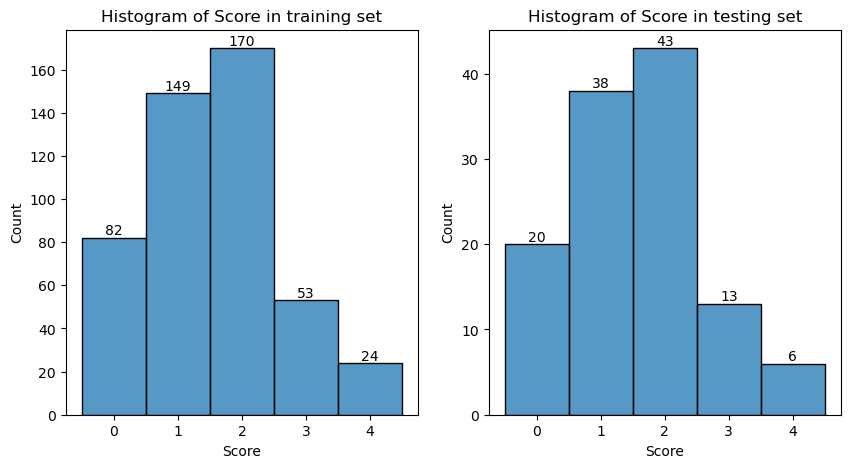

In [47]:
# draw the histogram of score in new histogram of train and test side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(train['Score'], kde = False, bins = 5, discrete=True, ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Histogram of Score in training set')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Count')

sns.histplot(test['Score'], kde = False, bins = 5, discrete=True, ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Histogram of Score in testing set')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Count')

plt.show()


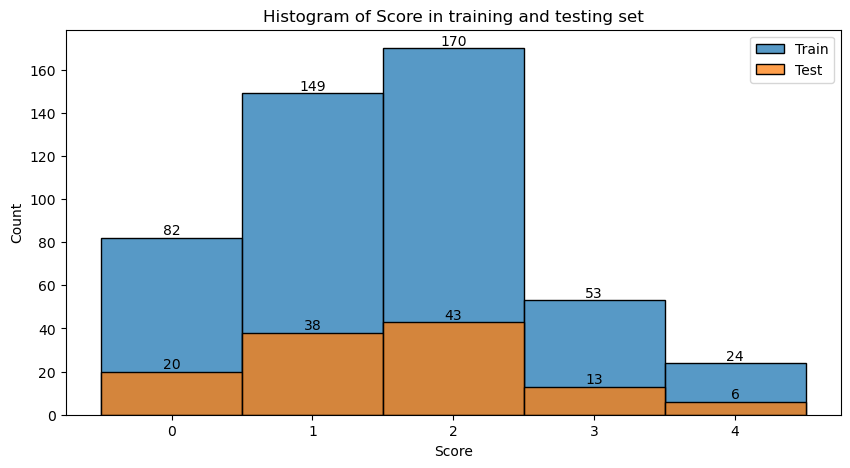

In [62]:
# draw the histogram of score of train and test in one histogram and also show their percentage 
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(train['Score'], kde = False, bins = 5, discrete=True, ax=ax, label='Train')
sns.histplot(test['Score'], kde = False, bins = 5, discrete=True, ax=ax, label='Test')  
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_title('Histogram of Score in training and testing set')
ax.set_xlabel('Score')
ax.set_ylabel('Count')
ax.legend()
plt.show()



AttributeError: 'numpy.ndarray' object has no attribute 'containers'

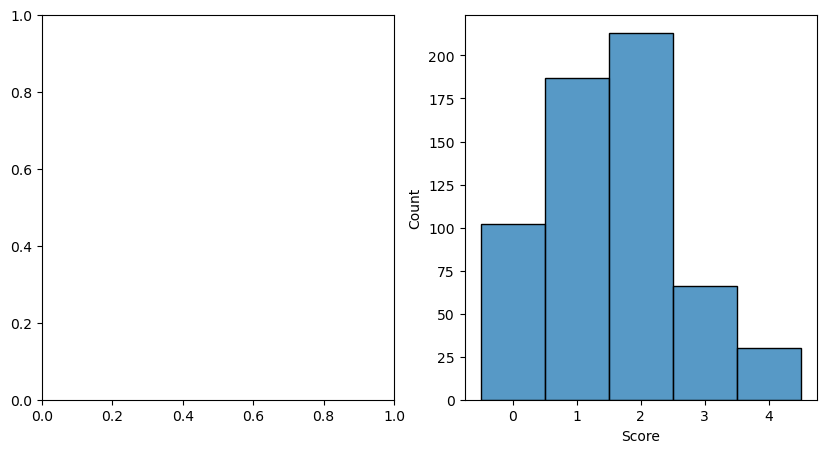

In [61]:
# draw the histogram of score of train and test in one histogram and also show their percentage 
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df['Score'], kde = False, bins = 5, discrete=True)
ax[0].bar_label(ax.containers[0])
ax[0].title('Histogram of Score before partition')
ax[0].xlabel('Score')
ax[0].ylabel('Count')



sns.histplot(train['Score'], kde = False, bins = 5, discrete=True, ax=ax, label='Train')
sns.histplot(test['Score'], kde = False, bins = 5, discrete=True, ax=ax, color='orange', label='Test')  
ax[1].bar_label(ax.containers[0])
ax[1].bar_label(ax.containers[1])
ax[1].set_title('Histogram of Score in training and testing set')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Count')
ax[1].legend()
plt.show()

